In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

In [44]:
import matplotlib
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # Mac
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐방지

In [45]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

import matplotlib
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # Mac
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐방지

# 비지도 학습(unsupervised learning)

*지도 학습이 주고, 비지도학습이 보조임*

의미 있는 형태로 판단하기는 힘듬.=> 지도 학습을 해야 함

비지도 학습을 한다고 해도 y값을 도출할 수 있는건 아님


1. 군집 만들기(CLUSTERING)

2. 차원 축소: 차원이 많으면 차원의 저주 발생

# 1. 차원 축소

## 주성분 분석

주가 되는 성분을 분석하는 것

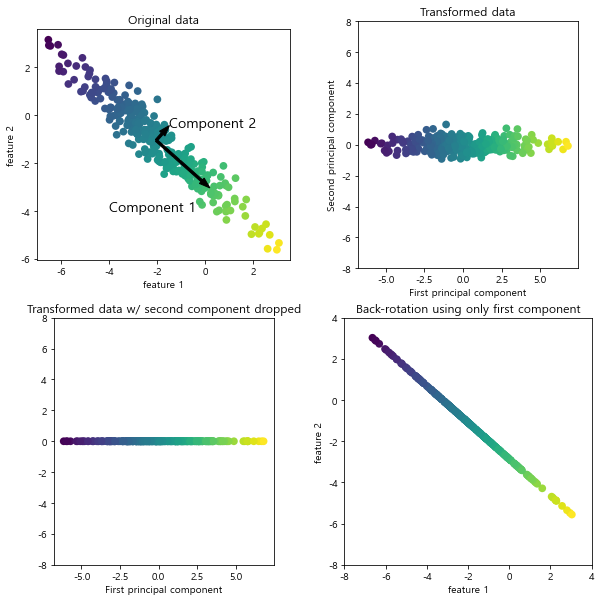

In [46]:
mglearn.plots.plot_pca_illustration()
#대각선 방향으로 있는 데이터를 0을 중심으로 맞춤-> 데이터를 1차원으로 바꾼다음에 원상태로
#이차함수를 내리꽂는거랑 비슷한 느낌이네
#component1이 주성분

In [47]:
from sklearn.datasets import load_breast_cancer

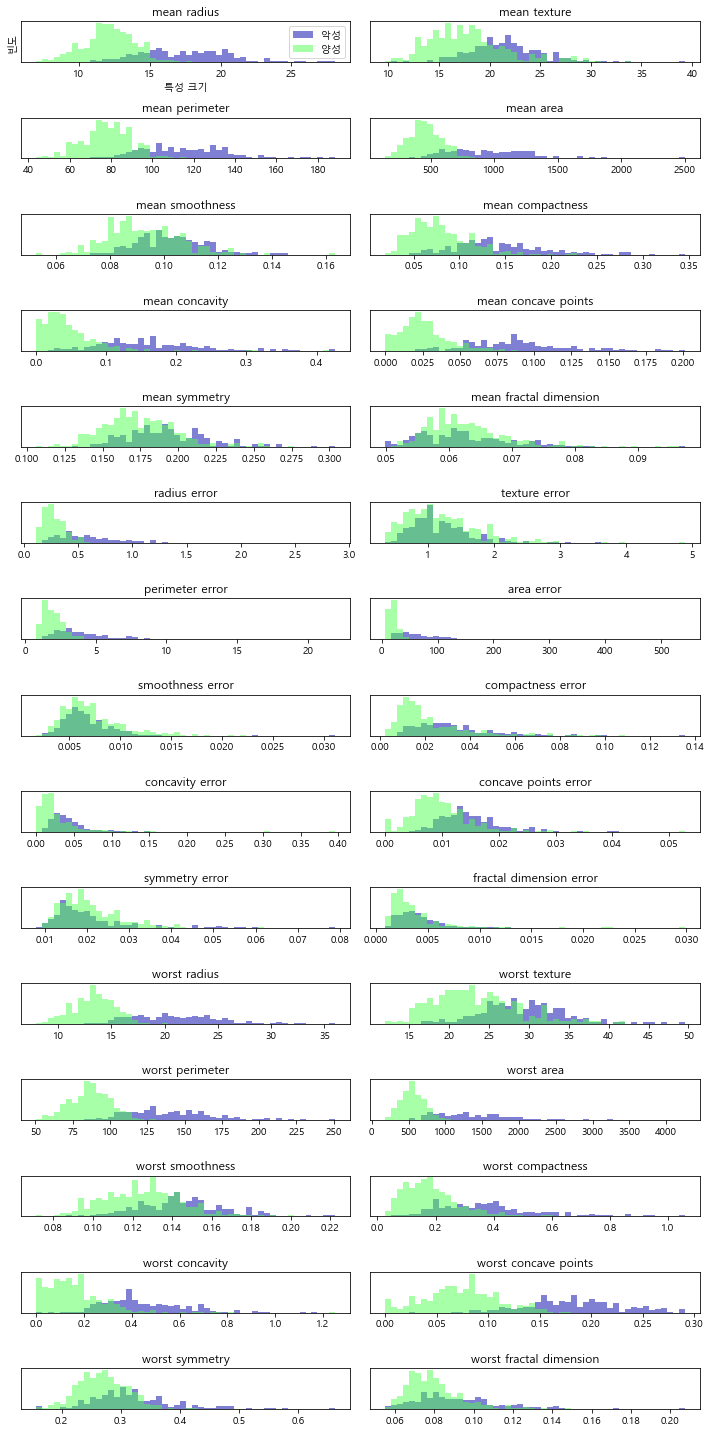

In [48]:
#시각화 코드 참고만
cancer=load_breast_cancer()
fig, axes=plt.subplots(15,2,figsize=(10,20))
maligant=cancer.data[cancer.target==0] #악성, 암
benign=cancer.data[cancer.target==1]  #양성. 정상
ax=axes.ravel() #1차원으로. 15*2를 30*1로 바꿀 수 있음.
for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(maligant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성','양성'],loc='best') #범례의 위치가 가장 잘 표현되는 곳에 표시
fig.tight_layout()

### 주요 코드

In [49]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)
#minmax, standard 두 종류. SVM에서 정확도를 높이기 위해 썼었음.국수 토익 총점 다르므로 총점으로 각 점수
#나누어진 느낌

In [50]:
#주성분 분석
from sklearn.decomposition import PCA
pca=PCA(n_components=2) #몇 개로 축소시킬 것이냐
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)


In [51]:
print('원본 데이터 형태:',str(X_scaled.shape)) #원본 데이터 형태: (569, 30)
print('축소된 데이터 형태:',str(X_pca.shape)) #축소된 데이터 형태: (569, 2)

#30개 컬럼을 2개로 줄였다.

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


In [52]:
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

### 시각화

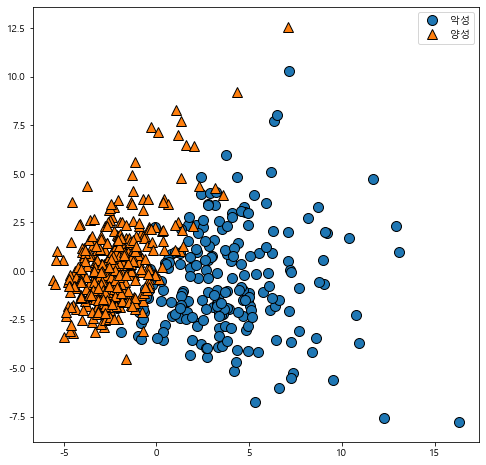

In [53]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target) 
plt.legend(['악성','양성'],loc='best')
plt.show()

In [54]:
print('PCA 주성분 형태:',pca.components_.shape)

PCA 주성분 형태: (2, 30)


In [55]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

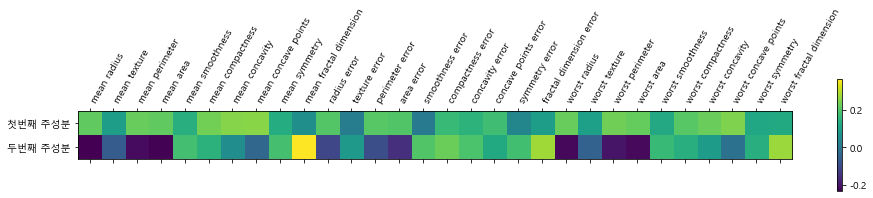

In [56]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['첫번째 주성분','두번째 주성분'])
plt.colorbar() #옆에 빠
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60,ha='left')
plt.show()

## T-SNE(차원축소 시각화 알고리즘)

In [57]:
from sklearn.datasets import load_digits
digits=load_digits()

In [58]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

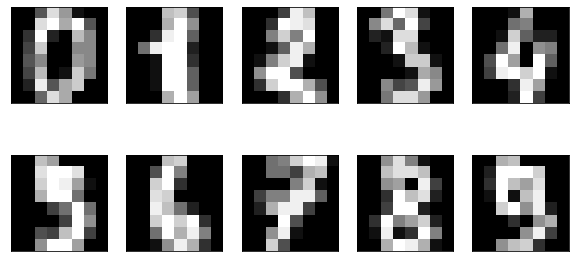

In [59]:


fig,axes=plt.subplots(2,5, figsize=(10,5),subplot_kw={'xticks':(),'yticks':()})

for ax,img in zip(axes.ravel(),digits.images):
    ax.imshow(img,cmap='gray')

In [60]:
#주성분 분석을 통해 분류를 하고싶다.
pca=PCA(n_components=2)
pca.fit(digits.data)

PCA(n_components=2)

In [61]:
digits_pca=pca.transform(digits.data)

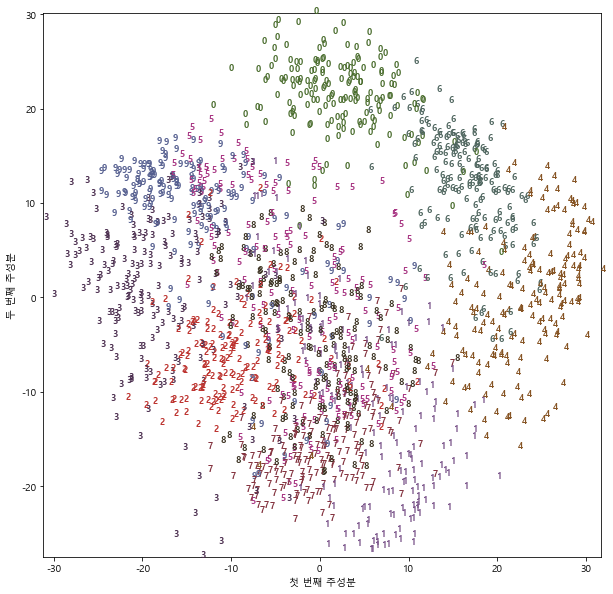

In [62]:
#시각화 과정
colors=['#476A2A','#785188','#BD3430','#4A2D4E','#875525',
        '#A83683','#4E655E','#853541','#3A3120','#535D8E']
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),color=colors[digits.target[i]],
            fontdict={'weight':'bold','size':9})
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.show()

#어떤것이 컴퓨터가 인식하기에 유사한지 시각적으로 알 수 있음.
#단어학습에 유용

## TSNE

In [63]:
from sklearn.manifold import TSNE
tsne=TSNE(random_state=42)
digits_tsne=tsne.fit_transform(digits.data)#fit하고 transform 하는건데 둘을 합친 것

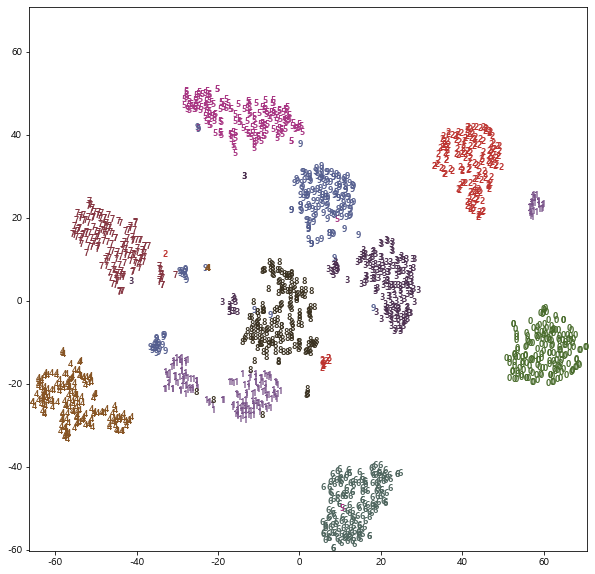

In [64]:
#시각화
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,0].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0],digits_tsne[i,1],str(digits.target[i]),
            color=colors[digits.target[i]],fontdict={'weight':'bold',
                                                    'size':9})
plt.show()

여기서부터 필기는 책에다가 함

_______
# 2. cluster: K-평균 군집

정답 y를 찾는 과정이라기보다는 데이터를 이해하고 시각화하는 과정 -> Q근데 예측하던데?

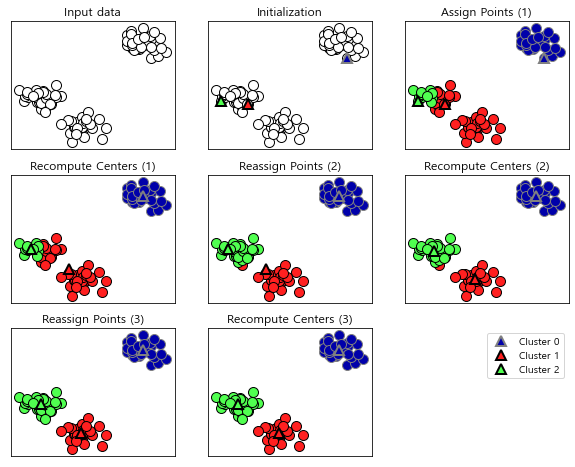

In [65]:
mglearn.plots.plot_kmeans_algorithm()

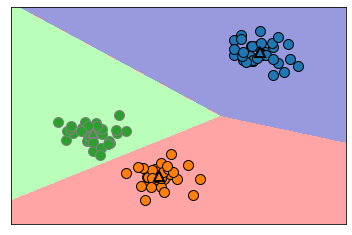

In [66]:
mglearn.plots.plot_kmeans_boundaries()

In [67]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [68]:
X,y=make_blobs(random_state=1)

In [69]:
X

array([[-7.94152277e-01,  2.10495117e+00],
       [-9.15155186e+00, -4.81286449e+00],
       [-1.14418263e+01, -4.45781441e+00],
       [-9.76761777e+00, -3.19133737e+00],
       [-4.53655648e+00, -8.40186288e+00],
       [-6.26302115e+00, -8.10666081e+00],
       [-6.38481234e+00, -8.47302970e+00],
       [-9.20490564e+00, -4.57687928e+00],
       [-2.76017908e+00,  5.55121358e+00],
       [-1.17104176e+00,  4.33091816e+00],
       [-1.00364080e+01, -5.56912090e+00],
       [-9.87589123e+00, -2.82386464e+00],
       [-7.17532921e+00, -8.77059017e+00],
       [-2.40671820e+00,  6.09894447e+00],
       [-4.87418245e+00, -1.00495890e+01],
       [-6.07854700e+00, -7.93969420e+00],
       [-6.83238762e+00, -7.47067670e+00],
       [-2.34673261e+00,  3.56128423e+00],
       [-1.03415662e+01, -3.90975169e+00],
       [-1.10926243e+01, -3.78396611e+00],
       [-6.50212109e+00, -7.91249101e+00],
       [-1.02639310e+01, -3.92073400e+00],
       [-6.81608302e+00, -8.44986926e+00],
       [-1.

In [70]:
y

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [71]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [72]:
print(kmeans.labels_)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [73]:
#예측
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


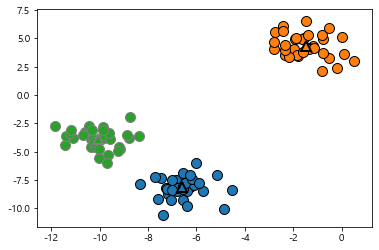

In [74]:
#시각화
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],markers='^',
                        markeredgewidth=2)
plt.show()

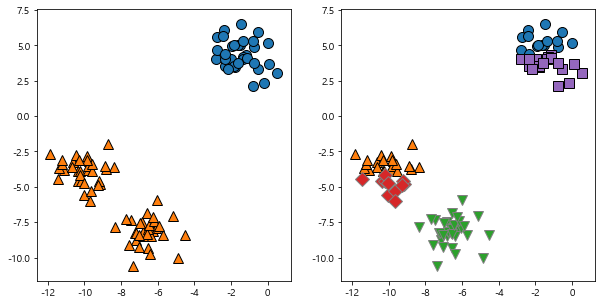

In [75]:
fig, axes=plt.subplots(1,2,figsize=(10,5))
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
assignment=kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignment,ax=axes[0])

#5개 분류
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
assignment=kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignment,ax=axes[1])
plt.show()

### 알고리즘 시각화

In [78]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

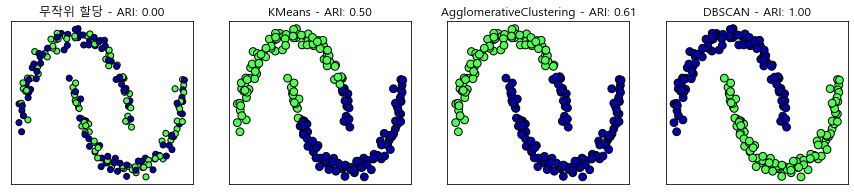

In [79]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
fig, axes = plt.subplots(1, 4, figsize=(15,3),
                        subplot_kw={"xticks":(), "yticks": ()})
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(
    adjusted_rand_score(y, random_clusters)))
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
               cmap=mglearn.cm3, edgecolors='black')
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters,
              cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                          adjusted_rand_score(y, clusters)))
plt.show()

----
# 데이터 표현과 특성 공학

## 원 핫 인코딩

In [92]:
# 자료 참고
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'gender',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('datasets/adult.data', header=None, index_col=False,
                  names=names)

In [93]:
data=df[['age', 'workclass','education', 'gender','hours-per-week','occupation','income']]
data

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Female,38,Tech-support,<=50K
32557,40,Private,HS-grad,Male,40,Machine-op-inspct,>50K
32558,58,Private,HS-grad,Female,40,Adm-clerical,<=50K
32559,22,Private,HS-grad,Male,20,Adm-clerical,<=50K


In [94]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [95]:
print('원본 특성:', list(data.columns))
print('')
data_dummies=pd.get_dummies(data)
print('get_dummies 후의 특성:',list(data_dummies.columns))

원본 특성: ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']

get_dummies 후의 특성: ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Oth

In [96]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [107]:
features=data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X=features.values
y=data_dummies['income_ >50K'].values
X.shape, y.shape

((32561, 44), (32561,))

In [110]:
X

array([[39, 40,  0, ...,  0,  0,  0],
       [50, 13,  0, ...,  0,  0,  0],
       [38, 40,  0, ...,  0,  0,  0],
       ...,
       [58, 40,  0, ...,  0,  0,  0],
       [22, 20,  0, ...,  0,  0,  0],
       [52, 40,  0, ...,  0,  0,  0]], dtype=int64)

In [111]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

### 모델 생성- 훈련-평가

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print('테스트 점수:{:.2f}'.format(logreg.score(X_test,y_test)))

테스트 점수:0.81


## scikit-learn에서 범주형 데이터 다루기

        OneHotEncoder, ColumnTransformer

In [112]:
demo_df=pd.DataFrame({'num feature':[0,1,2,1],'categorical feature':['양말','여우','양말','상자']})
display(demo_df)

,num feature,categorical feature
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [113]:
display(pd.get_dummies(demo_df))

,num feature,categorical feature_상자,categorical feature_양말,categorical feature_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [116]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False) #이게 무슨 의미라고?
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [117]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [118]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [121]:
ct=ColumnTransformer([('scaling',StandardScaler(),['age','hours-per-week'])
                     ,('one hot',OneHotEncoder(sparse=False),['workclass','education',
                                                             'gender','occupation'])])

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data_features=data.drop('income',axis=1)
X_train, X_test, y_train, y_test=train_test_split(data_features,data.income,random_state=0)

In [123]:
ct.fit(X_train)


ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['age', 'hours-per-week']),
                                ('one hot', OneHotEncoder(sparse=False),
                                 ['workclass', 'education', 'gender',
                                  'occupation'])])

In [124]:
X_train_trans=ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [126]:
logreg=LogisticRegression()
logreg.fit(X_train_trans,y_train)
X_test_trans=ct.transform(X_test)
print('{:.2f}'.format(logreg.score(X_test_trans,y_test)))

0.81


## make_column_transformer함수

In [127]:
from sklearn.compose import make_column_transformer
# 스다보면 제목이 줄어듬

# SVR 실습

In [128]:
X,y=mglearn.datasets.make_wave(n_samples=120)


In [130]:
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1) #line뭘한거지?

In [131]:
line

array([[-3.   ],
       [-2.994],
       [-2.988],
       [-2.982],
       [-2.976],
       [-2.97 ],
       [-2.964],
       [-2.958],
       [-2.952],
       [-2.946],
       [-2.94 ],
       [-2.934],
       [-2.928],
       [-2.922],
       [-2.916],
       [-2.91 ],
       [-2.904],
       [-2.898],
       [-2.892],
       [-2.886],
       [-2.88 ],
       [-2.874],
       [-2.868],
       [-2.862],
       [-2.856],
       [-2.85 ],
       [-2.844],
       [-2.838],
       [-2.832],
       [-2.826],
       [-2.82 ],
       [-2.814],
       [-2.808],
       [-2.802],
       [-2.796],
       [-2.79 ],
       [-2.784],
       [-2.778],
       [-2.772],
       [-2.766],
       [-2.76 ],
       [-2.754],
       [-2.748],
       [-2.742],
       [-2.736],
       [-2.73 ],
       [-2.724],
       [-2.718],
       [-2.712],
       [-2.706],
       [-2.7  ],
       [-2.694],
       [-2.688],
       [-2.682],
       [-2.676],
       [-2.67 ],
       [-2.664],
       [-2.658],
       [-2.652

In [129]:
from sklearn.svm import SVR

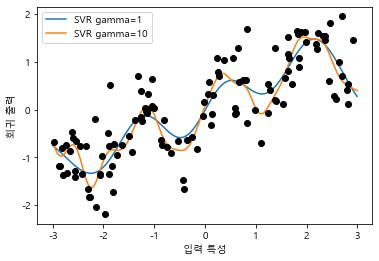

In [134]:
for gamma in [1,10]:
    svr=SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line),label='SVR gamma={}'.format(gamma))
plt.plot(X[:,0],y,'o',c='k')
plt.xlabel('입력 특성')
plt.ylabel('회귀 출력')
plt.legend(loc='best')
plt.show()

# 모델 평가와 성능 향상
## cross validation: 모든 요소가 훈련 요소에 참여

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X,y=make_blobs(random_state=0)
c=train_test_split(X,y,random_state=0)
logreg=LogisticRegression().fit(X_train, y_train)
print('{:.2f}'.format(logreg.score(X_test, y_test)*100))

88.00


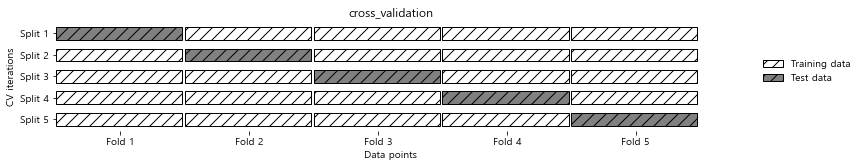

In [137]:
mglearn.plots.plot_cross_validation()

In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores)
# 교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]

scores = cross_val_score(logreg, iris.data, iris.target, cv=7)
print("교차 검증 점수:", scores)

print("교차 검증 평균:", scores.mean())

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]
교차 검증 점수: [0.95454545 1.         0.90909091 0.95238095 0.95238095 1.
 1.        ]
교차 검증 평균: 0.9669140383426098


In [142]:
from sklearn.model_selection import cross_validate

res=cross_validate(logreg
                ,iris.data, iris.target,cv=5, return_train_score=True)
res

{'fit_time': array([0.01698279, 0.01994443, 0.01692677, 0.01795197, 0.01695466]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

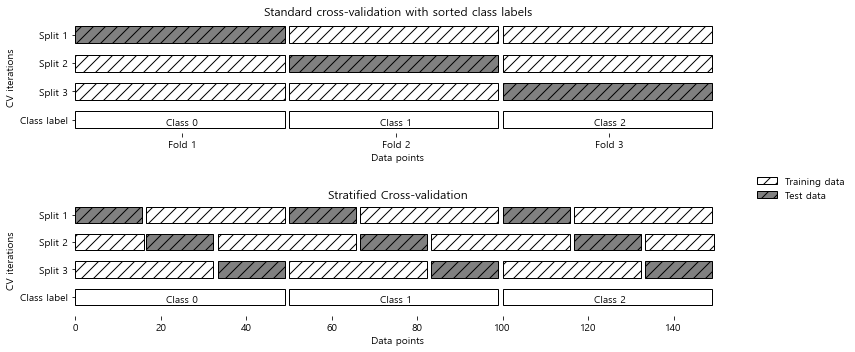

In [143]:
mglearn.plots.plot_stratified_cross_validation()

In [145]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)

In [146]:
cross_val_score(logreg, iris.data, iris.target,cv=kfold)

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [147]:
#이해를 위해 잠시 쉼

# grid search

In [153]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test=train_test_split(iris.data,iris.target,random_state=0)
print(X_train.shape, X_test.shape)
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svc=SVC(gamma=gamma,C=C)
        svc.fit(X_train,y_train)
        score=svc.score(X_test,y_test)
        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}
print('최고점수: {:.2f}'.format(best_score*100))
print('최적 매개변수:',best_parameters)

(112, 4) (38, 4)
최고점수: 97.37
최적 매개변수: {'C': 100, 'gamma': 0.001}


## 매개변수 과대적합과 검증세트

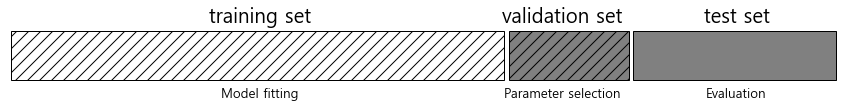

In [154]:
mglearn.plots.plot_threefold_split()

In [157]:
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test=train_test_split(iris.data,iris.target,random_state=0)
X_train, X_valid, y_train, y_valid=train_test_split(X_trainval,y_trainval,random_state=1)

In [158]:
print(X_train.shape,X_valid.shape, X_test.shape)

(84, 4) (28, 4) (38, 4)


In [162]:
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svc=SVC(gamma=gamma,C=C)
        svc.fit(X_train,y_train)
        score=svc.score(X_valid,y_valid)
        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}
print('검증 세트에서 최고점수: {:.2f}'.format(best_score*100))
print('최적 매개변수:',best_parameters)
print('최적 매개변수에서 테스트 세트 점수:{:.2f}'.format(best_score))

검증 세트에서 최고점수: 96.43
최적 매개변수: {'C': 10, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수:0.96


In [165]:
svm=SVC(**best_parameters) 
svm.fit(X_trainval,y_trainval)
test_score=svm.score(X_test,y_test)
test_score


0.9210526315789473

## 교차 검증을 사용한 그리드 서치

In [168]:
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svc=SVC(gamma=gamma,C=C)
        svc.fit(X_train,y_train)
        scores=cross_val_score(svc,X_trainval,y_trainval,cv=5)
        score=np.mean(scores)
        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}
svc=SVC(**best_parameters)


SVC(C=10, gamma=0.1)

In [169]:
svc.fit(X_test,y_test)

SVC(C=10, gamma=0.1)

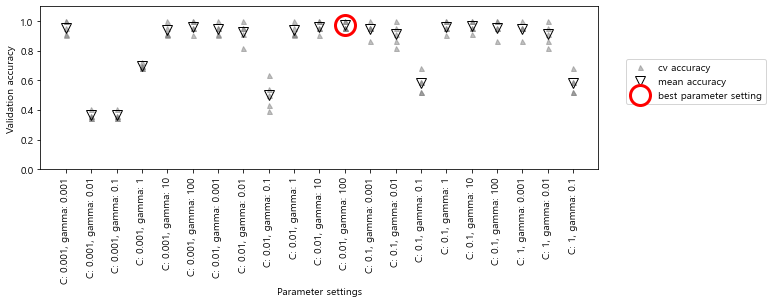

In [170]:
mglearn.plots.plot_cross_val_selection()

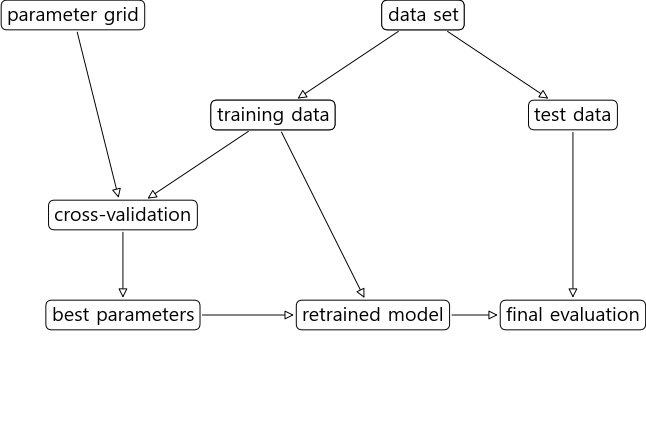

In [172]:
mglearn.plots.plot_grid_search_overview()

In [185]:
param_grid={'C':[0.001,0.01,0.1,1,10,100],
           'gamma':[0.001,0.01,0.1,1,10,100]}
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search=GridSearchCV(SVC(),param_grid,cv=5,return_train_score=True)
X_train, X_test, y_train, y_test=train_test_split(iris.data,iris.target,random_state=0)
grid_search.fit(X_train, y_train)
grid_search.score(X_test,y_test)
print('best parameters:',grid_search.best_params_)
print('best score:',grid_search.best_score_)

best parameters: {'C': 10, 'gamma': 0.1}
best score: 0.9731225296442687


In [186]:
#pandas를 이용하여 한눈에 보기
results=pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000399,0.000489,0.000399,0.000489,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.000598,0.000488,0.000000,0.000000,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.000399,0.000489,0.000399,0.000489,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.000399,0.000489,0.000199,0.000399,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.000599,0.000489,0.000399,0.000489,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
5,0.000798,0.000399,0.000199,0.000399,0.001,100,"{'C': 0.001, 'gamma': 100}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
6,0.000399,0.000489,0.000399,0.000489,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
7,0.000399,0.000489,0.000399,0.000489,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
8,0.000598,0.000489,0.000399,0.000489,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
9,0.000599,0.000489,0.000000,0.000000,0.01,1,"{'C': 0.01, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


In [187]:
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.00039897,0.00059824,0.000398874,0.000399065,0.000598526
std_fit_time,0.000488636,0.000488461,0.000488519,0.000488753,0.000488695
mean_score_time,0.000399017,0,0.000398922,0.000199413,0.000398874
std_score_time,0.000488694,0,0.000488578,0.000398827,0.000488519
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


In [190]:
scores=np.array(results.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores,xlabel='gamma',xticklabels=param_grid['gamma'],
                     ylabel='C',yticklabels=param_grid['C'],cmap['viridis'])
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-190-4bd46af10d36>, line 3)